# Lab2

In [7]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

x = data[:, 0]
y = data[:, 1]

### Linear regression

In [8]:
def generate_plot(x, y, theta_0, theta_1, cost):
    plt.scatter(x, y)
    plt.plot(x, theta_0 + theta_1*x, 'r-')
    plt.title(f"Regresja liniowa - koszt: {cost:.4f}")
    plt.xlabel("x"),
    plt.ylabel("y")
    plt.legend(["y", f"{float(theta_0):.4f} + {float(theta_1):.4f} * x"])
    plt.show()

In [9]:
def h_fun(x, theta_0, theta_1):
    """
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    """

    return theta_0 + theta_1 * x

In [10]:
def calculate_cost(x, y, theta_0, theta_1):
    """
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    """
    total_cost = 0
    x_size = len(x)

    for i in range(x_size):
        total_cost += (h_fun(x[i], theta_0, theta_1) - y[i]) ** 2

    return total_cost / (2 * x_size)

In [11]:
def calculate_new_theta(x, y, theta_0, theta_1, has_x: bool):
    new_theta = 0
    x_size = len(x)

    for i in range(x_size):
        if has_x:
            new_theta += (h_fun(x[i], theta_0, theta_1) - y[i]) * x[i]
        else:
            new_theta += h_fun(x[i], theta_0, theta_1) - y[i]

    return new_theta / x_size

In [12]:
def linear_regression(x, y, epsilon, learning_rate, theta_0, theta_1):
    prev_cost = 0
    cost = calculate_cost(x, y, theta_0, theta_1)

    while abs(prev_cost - cost) > epsilon:
        prev_cost = cost

        theta_0_temp = calculate_new_theta(x, y, theta_0, theta_1, False)
        theta_1_temp = calculate_new_theta(x, y, theta_0, theta_1, True)

        theta_0 = theta_0 - learning_rate * theta_0_temp
        theta_1 = theta_1 - learning_rate * theta_1_temp

        cost = calculate_cost(x, y, theta_0, theta_1)


    return theta_0, theta_1, cost

In [13]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

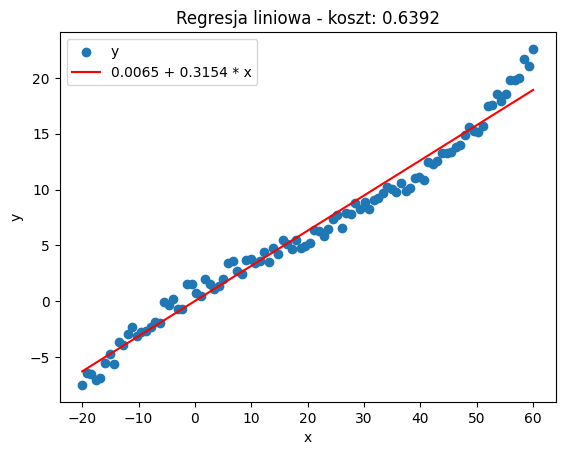

In [14]:
theta_0, theta_1, cost = linear_regression(x, y, eps, alpha, theta_0, theta_1)

generate_plot(x, y, theta_0, theta_1, cost)

### Multivariable linear regression _ measurements.csv

In [15]:
X = np.vstack([np.ones(x.shape), x])
y.shape = [1, -1]

In [16]:
def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return:
    '''

    return theta.T @ X # przykładowa realizacja, @ - mnożenie macierzowe

def calculate_cost(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''

    return ((h_fun(X, theta) - y) ** 2).sum() / (2 * X.shape[1])

In [1]:
def multivariable_linear_regression(X, y, theta, epsilon, learning_rate):
    prev_cost = 0
    cost = calculate_cost(X, y, theta)
    m = X.shape[1]

    while abs(cost - prev_cost) > epsilon:
        prev_cost = cost
        temp = h_fun(X, theta)
        h_y_diff = (temp - y)
        gradient = h_y_diff @ X.T
        theta = theta - learning_rate * (gradient.T / m)
        cost = calculate_cost(X, y, theta)

    return theta, cost

theta = np.array([[0], [0]])
eps = 1e-5
alpha = 0.001
theta, cost = multivariable_linear_regression(X, y, theta, eps, alpha)

NameError: name 'np' is not defined

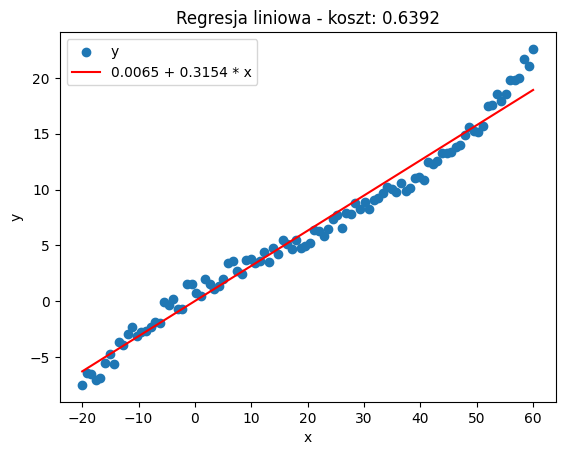

In [12]:
eps = 1e-5
alpha = 0.001
theta = np.array([[0], [0]])
theta, cost = multivariable_linear_regression(X, y, theta, eps, alpha)

generate_plot(X[1, :], y, theta[0], theta[1], cost)

### Multivariable linear regression _ housing.txt

In [13]:
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)
    y = data2[:, 2]
    y.shape = [1, y.shape[0]]
    X = data2[:, 0:2]
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T

y_scale = y.max()
y = y / y_scale

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale

In [14]:
theta = np.array([[0], [0], [0]])
eps = 1e-5
alpha = 0.001
example = np.array([[1], [1300], [4]])

theta, _ = multivariable_linear_regression(X, y, theta, eps, alpha)
h_example = theta.T @ (example / X_scale) * y_scale

print(f"theta = {theta}")
print(f'koszt nieruchomosi o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]}')

theta = [[0.24937951]
 [0.13701888]
 [0.16736231]]
koszt nieruchomosi o pow. 1300 z l. pok. 4 oszacowany na 296090.6397107442


### Polynomial regression

In [15]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)


x = data[:, 0]
y = data[:, 1]

X = np.vstack([np.ones(x.shape), x, x**2, x**3])

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale

y.shape = [1, -1]
y_scale = y.max()
y = y / y_scale

In [16]:
def generate_plot2(X, y, theta, X_scale, y_scale):
    h = np.transpose(theta.T @ X)
    plt.scatter(X[1, :] * X_scale[1], y * y_scale)
    plt.plot(X[1, :] * X_scale[1], h * y_scale, "r")
    plt.legend(["y", "h(x)"])
    plt.title("Regresja wielomianowa")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

In [17]:
eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0], [0]])

theta, _ = multivariable_linear_regression(X, y, theta, eps, alpha)

print(f"theta = {theta}")

theta = [[ 0.02528658]
 [ 0.77921902]
 [-0.49718083]
 [ 0.65075679]]


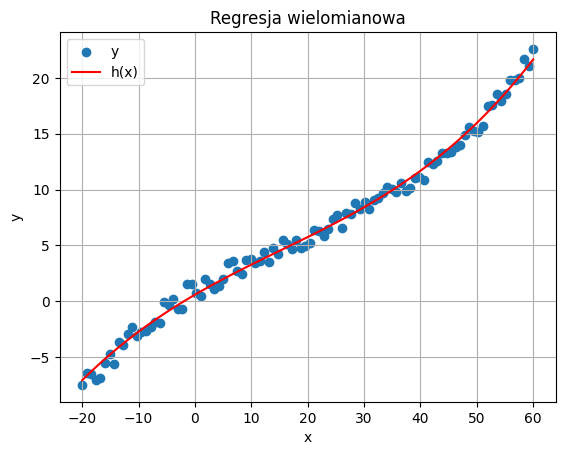

In [18]:
generate_plot2(X, y, theta, X_scale, y_scale)